In [2]:
import os,glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
file_path='cell_images'


In [4]:
name_class=os.listdir(file_path)
name_class

['Parasitized', 'Uninfected']

In [5]:

filepaths=list(glob.glob(file_path+'/**/*.*'))

In [6]:
filepaths

['cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'cell_image

In [7]:
labels=list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))
labels

['Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasi

In [8]:
filepath=pd.Series(filepaths,name='Filepath').astype(str)
labels=pd.Series(labels,name='label')
data=pd.concat([filepath,labels],axis=1)
data=data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,label
0,cell_images\Parasitized\C120P81ThinF_IMG_20151...,Parasitized
1,cell_images\Uninfected\C124P85ThinF_IMG_201510...,Uninfected
2,cell_images\Uninfected\C176P137NThinF_IMG_2015...,Uninfected
3,cell_images\Parasitized\C180P141NThinF_IMG_201...,Parasitized
4,cell_images\Uninfected\C81P42ThinF_IMG_2015081...,Uninfected


(array([0, 1]), [Text(0, 0, 'Parasitized'), Text(1, 0, 'Uninfected')])

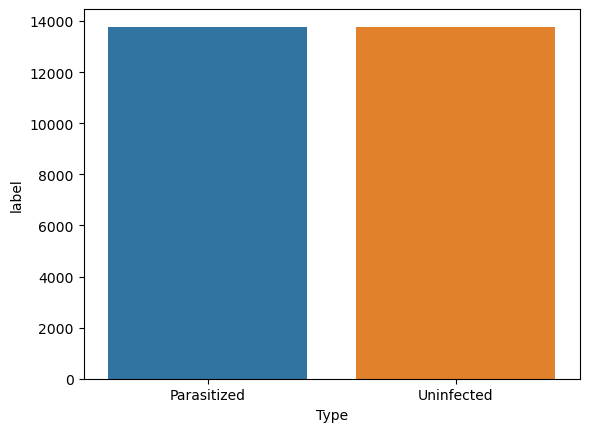

In [9]:
counts=data.label.value_counts()
sns.barplot(x=counts.index,y=counts)
plt.xlabel('Type')
plt.xticks()

In [10]:
train,test=train_test_split(data,test_size=0.25,random_state=42)

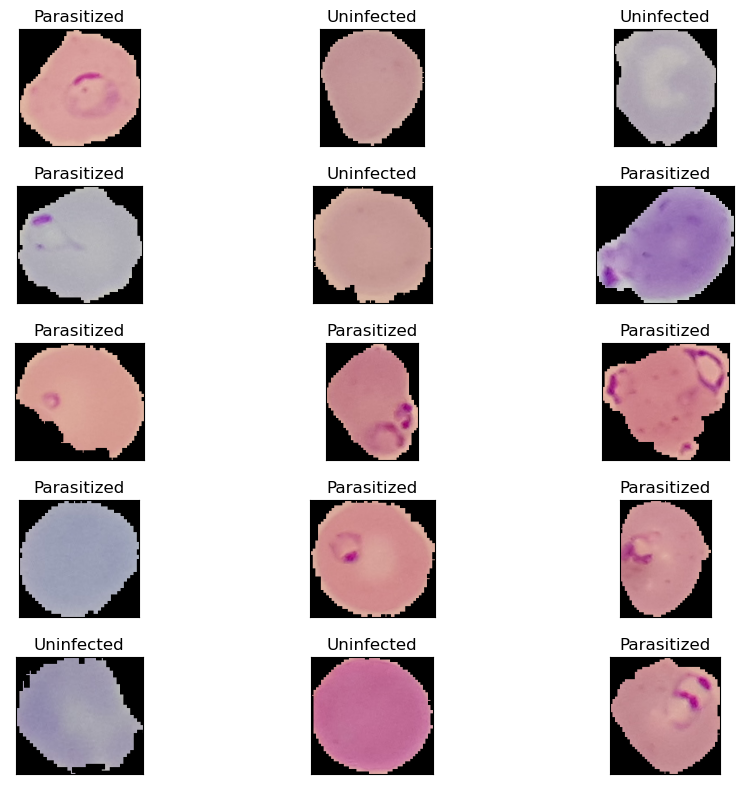

In [11]:
fig,axes= plt.subplots(nrows=5,ncols=3,figsize=(10,8),subplot_kw={'xticks':[],'yticks':[]})
for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.label[i])
plt.tight_layout()
plt.show()

In [12]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                 validation_split=0.2)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [13]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)


test_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)







Found 20668 validated image filenames belonging to 2 classes.


C:\Users\RAGHU\AppData\Roaming\Python\Python39\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(


Found 6890 validated image filenames belonging to 2 classes.
Found 6890 validated image filenames belonging to 2 classes.


In [14]:
import tensorflow as tf

pretrained_model=tf.keras.applications.MobileNet(
    input_shape=(100,100,3),alpha=1.0,depth_multiplier=1,dropout=0.001,
    include_top=False, weights='imagenet',input_tensor=None,pooling='max',
    classes=1000,classifier_activation='softmax'

)
pretrained_model.trainable=False

C:\Users\RAGHU\AppData\Local\Temp\ipykernel_9076\362221735.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pretrained_model=tf.keras.applications.MobileNet(


In [15]:
inputs=pretrained_model.input
x=Dense(128,activation='relu')(pretrained_model.output)
x=Dense(128,activation='relu')(x)

outputs=Dense(2,activation='softmax')(x)

model=Model(inputs=inputs,outputs=outputs)

In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
my_callbacks=[EarlyStopping(monitor='val_accuracy',
                           min_delta=0,
                           patience=2,
                           mode='auto')]

In [18]:
history =model.fit(
    train_gen,
    validation_data=valid_gen,
epochs=30,
    callbacks=my_callbacks)

Epoch 1/30


C:\Users\RAGHU\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


646/646 ━━━━━━━━━━━━━━━━━━━━ 596s 884ms/step - accuracy: 0.8050 - loss: 0.4638 - val_accuracy: 0.8560 - val_loss: 0.3174
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 446s 688ms/step - accuracy: 0.8704 - loss: 0.2995 - val_accuracy: 0.8650 - val_loss: 0.3032
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 449s 691ms/step - accuracy: 0.8824 - loss: 0.2741 - val_accuracy: 0.8701 - val_loss: 0.3008
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 359s 555ms/step - accuracy: 0.8874 - loss: 0.2619 - val_accuracy: 0.8816 - val_loss: 0.2832
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 362s 559ms/step - accuracy: 0.8940 - loss: 0.2522 - val_accuracy: 0.8592 - val_loss: 0.3137
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 367s 568ms/step - accuracy: 0.8921 - loss: 0.2494 - val_accuracy: 0.8563 - val_loss: 0.3370


In [19]:
model.save("modelmobilenet.h5")

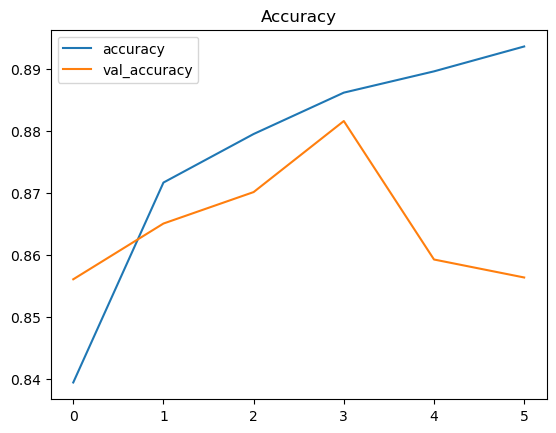

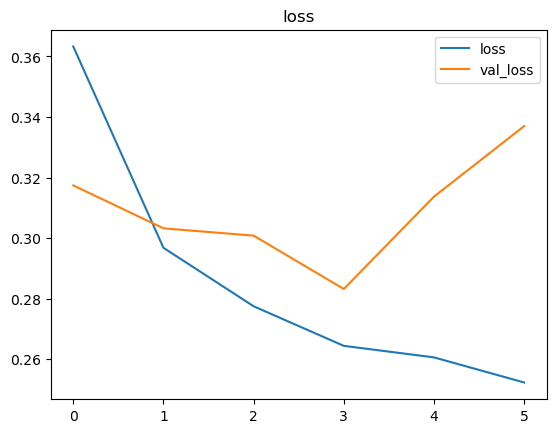

In [20]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('loss')
plt.show()

In [21]:
results=model.evaluate(test_gen,verbose=0)

print("Test loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.5f}".format(results[1]*100))

C:\Users\RAGHU\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test loss: 0.33699
Test Accuracy: 85.63135


In [22]:
pred = model.predict(test_gen)
pred=np.argmax(pred,axis=1)
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred= [labels[k] for k in pred]

216/216 ━━━━━━━━━━━━━━━━━━━━ 97s 432ms/step


In [23]:
y_test = list(test.label)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

 Parasitized       0.95      0.76      0.84      3482
  Uninfected       0.80      0.96      0.87      3408

    accuracy                           0.86      6890
   macro avg       0.87      0.86      0.86      6890
weighted avg       0.87      0.86      0.86      6890



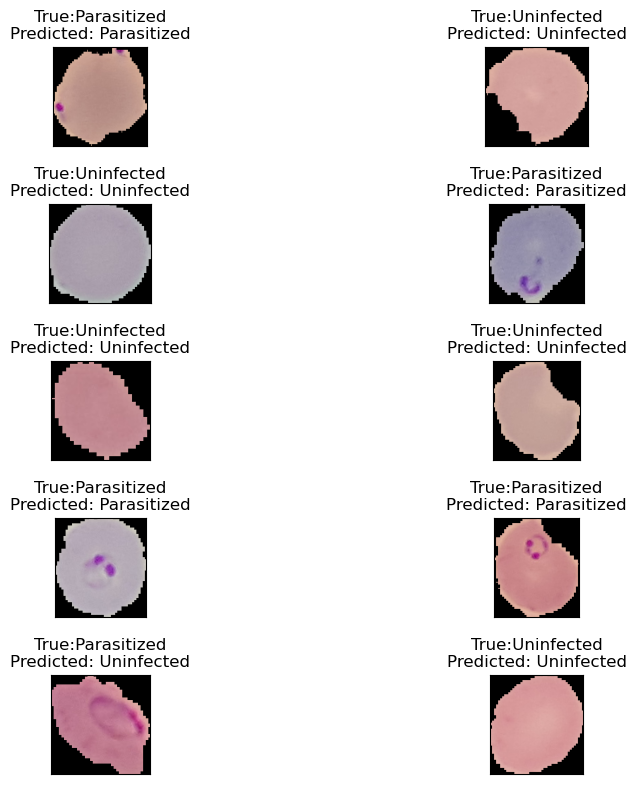

In [24]:
fig,axes = plt.subplots(nrows=5, ncols=2, figsize=(12,8),subplot_kw={'xticks':[],'yticks':[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True:{test.label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [46]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
img_path='test_malaria.png'
img=cv2.imread(img_path)
img=cv2.resize(img,(100,100))
x=np.expand_dims(img,axis=0)
x=preprocess_input(x)
result=model.predict(x)
print((result*100).astype('int'))
a=np.argmax(result, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[[58 41]]


In [53]:
b=np.array((result*100).astype('int'))
if (b[0][0]>b[0][1]):
    print("Parasetized")
else:
    print("Uninfected")

Parasetized
